<a href="https://colab.research.google.com/github/Kanchan20-Mandal/Deep-Learning/blob/main/Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiclass Classification


In [1]:
path = "https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/mobile_train%20(1).csv"
import pandas as pd
df = pd.read_csv(path)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Target feature: Price range
  0   cheap
  1   Good price
  2   Expensive

## perform basic data quality checks

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [3]:
df.shape

(2000, 21)

In [4]:
df.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [5]:
df.duplicated().sum()

np.int64(0)

## There are no missing values nor any duplicated data present in this dataset

## Separate X and Y features

In [6]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
X=df.drop(columns=["price_range"])
Y=df[["price_range"]]

In [8]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [9]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [10]:
X.dtypes

,0
battery_power,int64
blue,int64
clock_speed,float64
dual_sim,int64
fc,int64
four_g,int64
int_memory,int64
m_dep,float64
mobile_wt,int64
n_cores,int64


## Data Preprocessing and Data cleaning

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [12]:
num_pipe=make_pipeline(
    SimpleImputer(strategy="mean"),StandardScaler()
).set_output(transform="pandas")

In [13]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [14]:
X_pre=num_pipe.fit_transform(X)
X_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


## Perform train test split

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,train_size=0.8,random_state=42)

In [16]:
xtrain.shape

(1600, 20)

In [17]:
xtest.shape

(400, 20)

## Preprocess Y data

In [18]:
from keras.utils import to_categorical
ytrain_cat=to_categorical(ytrain)
ytest_cat=to_categorical(ytest)

In [19]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [20]:
ytrain_cat

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

## Model building using Keras

In [21]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks import EarlyStopping

In [22]:
ytrain_cat.shape

(1600, 4)

In [23]:
model=Sequential()
model.add(Input(shape=(xtrain.shape[1],)))
model.add(Dense(units=64,activation="relu"))
model.add(Dropout(rate=0.3))
model.add(Dense(units=32,activation="relu"))
model.add(Dropout(rate=0.15))
model.add(Dense(units=ytrain_cat.shape[1],activation="softmax"))

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,556 (13.89 KB)

 Trainable params: 3,556 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from warnings import filterwarnings
filterwarnings('ignore')

In [26]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [27]:
es=EarlyStopping(monitor="val_loss",patience=10)

In [28]:
hist=model.fit(xtrain,ytrain_cat,validation_split=0.2,epochs=200,callbacks=[es])

Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.2526 - loss: 1.5402 - val_accuracy: 0.3844 - val_loss: 1.2891
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3887 - loss: 1.2956 - val_accuracy: 0.4906 - val_loss: 1.1481
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4774 - loss: 1.1402 - val_accuracy: 0.5844 - val_loss: 0.9968
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5485 - loss: 1.0339 - val_accuracy: 0.6625 - val_loss: 0.8547
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5861 - loss: 0.8888 - val_accuracy: 0.7094 - val_loss: 0.7352
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6959 - loss: 0.7506 - val_accuracy: 0.7594 - val_loss: 0.6383
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6917 - loss: 0.7160 - val_accuracy: 0.8000 - val_loss: 0.5688
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7322 - loss: 0.6136 - val_accuracy: 0.8438 - 

## Learning curve

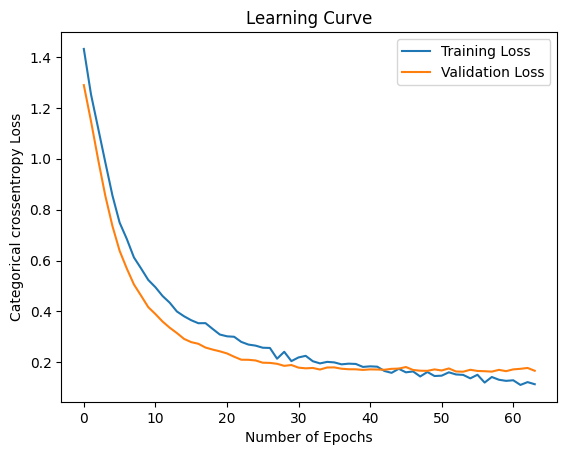

In [29]:
import matplotlib.pyplot as plt

plt.plot(hist.history["loss"],label="Training Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Categorical crossentropy Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

## Evaluate the model

In [31]:
model.evaluate(xtrain,ytrain_cat)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9971 - loss: 0.0370


[0.05990969017148018, 0.9850000143051147]

In [32]:
model.evaluate(xtest,ytest_cat)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9556 - loss: 0.1181


[0.14245370030403137, 0.9424999952316284]

## Predictions

In [33]:
ypred_test=model.predict(xtest)
ypred_test[:5]

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


array([[9.7812736e-01, 2.1872634e-02, 5.3295168e-10, 1.6988489e-31],
       [2.3340253e-12, 2.3748558e-03, 9.9761629e-01, 8.8859842e-06],
       [3.5609407e-03, 9.9608105e-01, 3.5798212e-04, 8.4770617e-19],
       [1.8851396e-32, 2.9598131e-13, 2.0196056e-03, 9.9798042e-01],
       [2.7067922e-06, 9.3001646e-01, 6.9980867e-02, 1.0209657e-11]],
      dtype=float32)

In [34]:
import numpy as np
np.max(ypred_test,axis=1)

array([0.97812736, 0.9976163 , 0.99608105, 0.9979804 , 0.93001646,
       0.98240924, 0.65354264, 0.9960348 , 0.9418397 , 0.9727409 ,
       0.9842731 , 0.6302539 , 0.9920248 , 0.9990595 , 0.852516  ,
       0.87275493, 0.9937302 , 0.99943155, 0.9975896 , 0.9904789 ,
       0.99619055, 0.663972  , 0.93969303, 0.99758303, 0.9953976 ,
       0.9659814 , 0.83341545, 0.87360513, 0.9917774 , 0.9992273 ,
       0.9758253 , 0.99981505, 0.99681914, 0.9856764 , 0.94445723,
       0.9944952 , 0.9950623 , 0.9810157 , 0.999213  , 0.8201852 ,
       0.86897326, 0.6219558 , 0.8318806 , 0.99899834, 0.85688716,
       0.7547396 , 0.9278666 , 0.9929275 , 0.99678767, 0.9923767 ,
       0.9998945 , 0.9984547 , 0.9981285 , 0.9965557 , 0.8350223 ,
       0.7573922 , 0.99761045, 0.94868934, 0.9997713 , 0.99845743,
       0.9005015 , 0.99907756, 0.9904991 , 0.97169757, 0.986735  ,
       0.94354385, 0.99963176, 0.99922335, 0.9992175 , 0.9718178 ,
       0.9588099 , 0.9806126 , 0.99928206, 0.9926596 , 0.84348

In [35]:
ypred_test_final=np.argmax(ypred_test,axis=1)
ypred_test_final

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 3, 2, 3, 3, 1, 0, 0, 2,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 3, 2, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 1, 2, 3, 1, 3, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 3, 3, 3, 1, 0, 1, 2, 2, 3, 3, 1, 0, 0, 3, 1,
       1, 2, 0, 1, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 1, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 1, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 1, 0, 1, 2, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 2, 3, 0, 1, 2,
       2, 2, 3, 0, 2, 3, 2, 3, 2, 1, 0, 2, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [36]:
ypred_test_final[:5]


array([0, 2, 1, 3, 1])

In [37]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


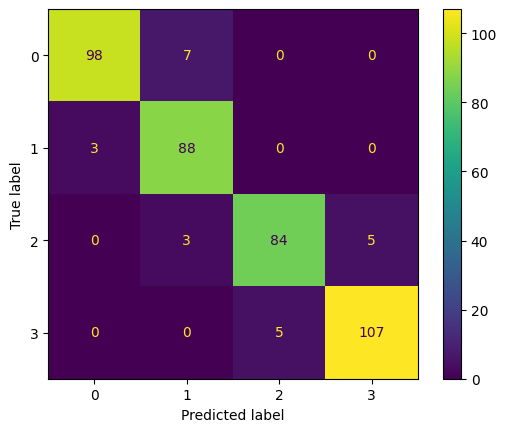

In [38]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf=confusion_matrix(ytest,ypred_test_final)
ConfusionMatrixDisplay(cf).plot()

In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test_final))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       105
           1       0.90      0.97      0.93        91
           2       0.94      0.91      0.93        92
           3       0.96      0.96      0.96       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



## Save the model for final out of sample predictions

In [40]:
model.save("Mobile prediction.keras")

In [41]:
from keras.models import load_model

In [42]:
m1=load_model("/content/Mobile prediction.keras")
m1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,670 (41.68 KB)

 Trainable params: 3,556 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,114 (27.79 KB)

In [43]:
path2 = "https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/mobile_test%20(1).csv"
xnew = pd.read_csv(path2)
xnew.head()


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [44]:
xnew=xnew.drop(columns=["id"])
xnew.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [45]:
xnew_pre=num_pipe.transform(xnew)
xnew_pre

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.445060,1.010051,0.340463,0.981177,2.232650,-1.043966,-1.490890,-1.393304,1.490528,-0.664768,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584,-1.786861,0.994018,-1.014099
1,-0.904874,1.010051,-1.253064,0.981177,-0.071307,0.957886,1.596010,1.034357,1.434017,0.209639,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267,0.559641,-1.006018,-1.014099
2,1.294038,1.010051,1.566254,-1.019184,-0.762495,-1.043966,-0.278179,1.381165,1.292737,-0.664768,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077,-1.786861,0.994018,0.986097
3,0.699922,-0.990050,-1.253064,0.981177,3.154233,0.957886,-0.388426,-0.006069,-1.250297,1.521249,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267,0.559641,0.994018,-1.014099
4,0.444976,-0.990050,-0.149853,-1.019184,1.541463,0.957886,0.934531,-0.006069,-0.911225,0.646842,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267,0.559641,-1.006018,0.986097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.050473,1.010051,0.463042,-1.019184,-0.992890,0.957886,1.210147,-0.006069,0.840642,1.084046,1.168355,-0.002497,-0.783435,-0.002963,0.402047,0.512708,0.730240,0.559641,0.994018,-1.014099
996,-1.432976,-0.990050,0.340463,0.981177,-0.992890,-1.043966,-1.049904,1.381165,1.292737,-0.227564,-1.305750,1.142498,0.880565,-0.176321,-1.022389,-1.094526,1.462493,-1.786861,0.994018,0.986097
997,-0.121824,-0.990050,-0.149853,-1.019184,-0.762495,0.957886,-1.325520,-0.006069,-1.702391,-1.539175,0.343653,-0.378903,-0.987096,-0.831024,-1.734608,-1.324131,0.547176,0.559641,-1.006018,-1.014099
998,0.670330,1.010051,-1.253064,0.981177,-0.992890,-1.043966,0.989655,-0.352878,0.868898,-1.101971,0.343653,-1.368378,-0.970895,0.354819,0.639453,1.201522,-0.917331,-1.786861,0.994018,-1.014099


In [46]:
final_preds=m1.predict(xnew_pre)
final_preds[:10]

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


array([[3.8645046e-21, 1.1952757e-07, 4.4605136e-01, 5.5394852e-01],
       [4.0770334e-31, 6.2933157e-12, 2.6198260e-03, 9.9738020e-01],
       [4.2361945e-20, 3.1246793e-07, 3.4937698e-01, 6.5062273e-01],
       [2.3942919e-38, 1.5495328e-14, 6.7987014e-04, 9.9932015e-01],
       [7.2938937e-04, 9.9839240e-01, 8.7812834e-04, 5.5691410e-14],
       [5.8509974e-30, 1.0450899e-11, 6.7794635e-03, 9.9322057e-01],
       [5.6051939e-45, 1.3009933e-17, 1.1553862e-04, 9.9988449e-01],
       [4.7292822e-05, 9.9871075e-01, 1.2419019e-03, 3.2347572e-14],
       [4.8178851e-26, 2.7426739e-10, 9.2962263e-03, 9.9070376e-01],
       [9.9554551e-01, 4.4544996e-03, 8.9717616e-13, 1.9744478e-39]],
      dtype=float32)

In [47]:
final_price=np.argmax(final_preds,axis=1)
final_price[:10]

array([3, 3, 3, 3, 1, 3, 3, 1, 3, 0])

## Save the predictions to dataframe and then save the results

In [48]:
xnew["Price Range"]=final_price
xnew.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price Range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,3
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


In [49]:
xnew.to_csv("PriceRange Results.csv")